In [2]:
import math
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

numInitSubstrate = 20
numInitEnzyme = 10
numTraces = 100

numTimeSteps = 125
simulationTime = 2.5

dt = simulationTime/numTimeSteps

q1 = numInitEnzyme                            # there are no complex molecules at beginning, therefore q1 = X(2) = 10

c1 = 1.2                                       # some reaction rates
c2 = 0.3                                      
c3 = 2.9                                      

# Define the state-transition vectors and propensity functions
v1 = [-1,-1];
v2 = [1,1];
v3 = [0,1];

a1 = lambda Substrate, Enzyme: Substrate*Enzyme*c1
a2 = lambda Enzyme: (q1-Enzyme)*c2
a3 = lambda Enzyme: (q1-Enzyme)*c3

# Instead of Calculating directly on P, we will sample a given number of
# traces. For each trace we store state and time.

TraceTimes = [0 for i in range(numTraces)]
Trace_Substrate_State = [0 for i in range(numTraces)]
Trace_Enzyme_State = [0 for i in range(numTraces)]

# Initialize the state - each simulation starts with the same condition
Trace_Substrate_State[:] = [numInitSubstrate for i in range(numTraces)]
Trace_Enzyme_State[:] = [numInitEnzyme for i in range(numTraces)]



def calcPFromTraces(Trace_Substrate_State, Trace_Enzyme_State, numInitSubstrate, numInitEnzyme):

    # Initialize as 0
    P = pd.DataFrame([[0 for i in range(numInitSubstrate)] for i in range(numInitEnzyme)])    # TODO fill in num Enzyme and num Init substrate
      # There are at most 20 Substrates and 10 Enzymes 

    # loop over all traces to accumulate the states of each specific one
    for T in range(len(Trace_Substrate_State)):
        P.iloc[Trace_Substrate_State[T],Trace_Enzyme_State[T]] = P.iloc[Trace_Substrate_State[T],Trace_Enzyme_State[T]] + 1
    
    # normalize and print heatmap
    P = P/ len(numInitSubstrate)# TODO normalize
    sns.heatmap(P, annot=True)
    plt.xlabel('# ') # TODO what is plotted on x axis
    plt.ylabel('# ') # TODO what is plotted on y axis
    plt.savefig('Gillespie_traces/Gillespie_trace' + str(tSteps)+ '.png')
    plt.close()
    
    return P



for tSteps in range(numTimeSteps): # loop over all time steps
    for T in range(numTraces): # loop over all traces
        
        Enzyme, Substrate  = Trace_Enzyme_State[T], Trace_Substrate_State[T] # copy current state into local state variables
        while (TraceTimes[T] < dt*tSteps): # while the next milestone in time is not reached yet...
            
            # calculate propensities
            a1X = a1(Substrate, Enzyme)
            a2X = a2(Enzyme)
            a3X = a3(Enzyme)
            
            rand_uniform = np.random.uniform(low=0.0, high=1.0, size=1)
            # TODO calculate xi1 (variable which determines which reaction takes place)
            xi1 =      
            
            # Determine the type of reaction
            if (Substrate, Enzyme) == (0,10): # if the trace is in the final state, set time to end time
                TraceTimes[T] = simulationTime
                
            elif (): # TODO fill in condition for reaction 1 to happen
                Substrate, Enzyme = Substrate + v1[0], Enzyme + v1[1]
                
            elif (): # TODO fill in condition for reaction 2 to happen
                Substrate, Enzyme = Substrate + v2[0], Enzyme + v2[1]
            else: # reaction 3
                # TODO write equation 3
            
            # Update time according to propensities
            try: # in the last while iteration all ai get 0
                xi2 = -math.log(1-rand_uniform)/(a1X + a2X + a3X)
            except (ZeroDivisionError):
                xi2 = 10000 # must be at least dt*tSteps to end the wile loop
            
            # TODO update TraceTimes 
            
        # store local state variable in TraceStates vector
        Trace_Substrate_State[T] = Substrate
        Trace_Enzyme_State[T] = Enzyme

    # Calculte P from all Traces
    P = calcPFromTraces(Trace_Substrate_State, Trace_Enzyme_State,numInitSubstrate,numInitEnzyme)
    


SyntaxError: invalid syntax (760424053.py, line 79)

In [ ]:
import imageio


# Build GIF
with imageio.get_writer('Gillespie_gif.gif', mode='I') as writer:
    for filename in range(numTimeSteps):
        image = imageio.imread('Gillespie_traces/Gillespie_trace' + str(filename)+ '.png')
        writer.append_data(image)

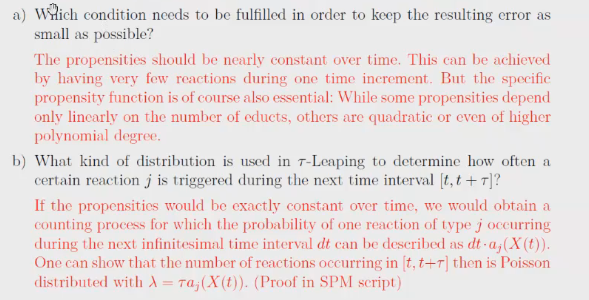